<a href="https://colab.research.google.com/github/FAMILIAR-project/SEAI4Sport2425/blob/main/DecisionTreePassSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import json
import pandas as pd

# download https://github.com/FAMILIAR-project/SEAI4Sport2425/raw/refs/heads/main/15946.json
import requests

# URL of the file
url = "https://github.com/statsbomb/open-data/raw/refs/heads/master/data/events/15946.json"

# Local file name where the file will be saved
local_filename = "15946.json"

try:
    # Send a GET request to the URL
    response = requests.get(url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the file in write-binary mode and save the content
        with open(local_filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):  # Download in chunks
                file.write(chunk)
        print(f"File downloaded successfully and saved as '{local_filename}'.")
    else:
        print(f"Failed to download file. HTTP Status Code: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {e}")



# Load the JSON file
file_path = '15946.json'
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract relevant fields for passes
passes = []
for event in data:
    if event.get("type", {}).get("name") == "Pass":
        pass_event = {
            "match_id": event.get("match_id", "Unknown"),
            "team_name": event.get("team", {}).get("name", "Unknown"),
            "player_id": event.get("player", {}).get("id", None),
            "duration": event.get("duration", None),
            "start_x": event.get("location", [None, None])[0],
            "start_y": event.get("location", [None, None])[1],
            "end_x": event.get("pass", {}).get("end_location", [None, None])[0],
            "end_y": event.get("pass", {}).get("end_location", [None, None])[1],
            "success": 1 if event.get("pass", {}).get("outcome", {}).get("name", "Complete") == "Complete" else 0,
        }
        passes.append(pass_event)

# Create a DataFrame
df_passes = pd.DataFrame(passes)

# Display the first few rows
df_passes.head(), df_passes.info()


File downloaded successfully and saved as '15946.json'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   match_id   1163 non-null   object 
 1   team_name  1163 non-null   object 
 2   player_id  1163 non-null   int64  
 3   duration   1163 non-null   float64
 4   start_x    1163 non-null   float64
 5   start_y    1163 non-null   float64
 6   end_x      1163 non-null   float64
 7   end_y      1163 non-null   float64
 8   success    1163 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 81.9+ KB


(  match_id         team_name  player_id  duration  start_x  start_y  end_x  \
 0  Unknown  Deportivo Alavés       6581  2.015669     61.0     40.1   33.8   
 1  Unknown  Deportivo Alavés       6855  3.287421     36.8     27.3   86.5   
 2  Unknown         Barcelona       5203  1.696529     33.6      5.9   35.1   
 3  Unknown         Barcelona       5470  1.135950     35.1     18.3   36.2   
 4  Unknown         Barcelona       5477  0.757764     34.3      4.9   25.3   
 
    end_y  success  
 0   28.0        1  
 1   74.2        0  
 2   18.3        1  
 3    5.3        1  
 4    1.6        1  ,
 None)

The JSON file is large and contains rich information about various events, including passes. I'll extract relevant fields like pass.end_location, pass.outcome, duration, and other metadata to construct a dataset suitable for building a decision tree model. Then, I'll preprocess the data and train the model to predict the success or failure of a pass.


The dataset has been extracted and contains 1,163 pass events with the following fields:

* match_id: Identifier for the match.
* team_name: Name of the team.
* player_id: Identifier for the player making the pass.
* duration: Duration of the pass event.
* start_x, start_y: Starting coordinates of the pass.
* end_x, end_y: Ending coordinates of the pass.
* success: Whether the pass was successful (1) or not (0).




A decision tree is a predictive model that mimics the process of human decision-making. It works by asking a series of "yes" or "no" questions based on features of the data, splitting it into smaller subsets at each step. At the root of the tree, the most influential feature is chosen to make the first split, and the process continues until it arrives at a prediction, represented by leaf nodes. For instance, in predicting pass success, the tree might first ask if the pass's duration is short (a likely indicator of success) and then refine predictions further by considering the pass's distance or its proximity to the goal.

**Formal Explanation**

Formally, a decision tree recursively partitions the feature space into regions that maximize information gain, typically measured by metrics such as Gini impurity or entropy. Each split divides the data into groups that are more homogeneous in terms of the target variable. For example, a split on duration <= 1.5 could separate passes into likely successful and unsuccessful groups, reducing the impurity in each subset. The tree is trained by selecting splits that result in the highest reduction in impurity, building branches until a stopping criterion (e.g., maximum depth or minimum samples per leaf) is met. Each leaf represents a region of the feature space where predictions are made based on the majority class of samples in that region.

**Interpretability and Insights**

Decision trees are inherently interpretable, as they provide a clear, step-by-step reasoning process for predictions. In this case, the tree might prioritize features like duration or distance to goal because shorter passes or those further from the opponent's goal are more likely to be successful. By visualizing the tree, analysts can identify critical thresholds and understand how different factors interact to influence outcomes. This interpretability makes decision trees particularly valuable in fields like sports analytics, where transparency and actionable insights are essential for refining strategies.

**Inputs of a Decision Tree**

The inputs to a decision tree are:

Features (Independent Variables): These are the predictors or attributes used by the model to make decisions. For example:

Numerical Features: Duration of a pass, pass distance, or distance to goal.
Categorical Features: Player role (e.g., defender, midfielder).
Training Data: A dataset where the feature values and the corresponding target values (labels) are already known. For instance:

Features: [duration, pass_distance, distance_to_goal, distance_to_center, interceptability_speed].
Target: success (whether the pass was successful, encoded as 0 or 1).
Hyperparameters (Optional): Settings that control the tree's growth and behavior, such as:

max_depth: The maximum number of levels in the tree.
min_samples_split: The minimum number of samples required to split a node.

**Outputs of a Decision Tree**

The output of a decision tree is:

Predicted Label (Classification): A categorical or discrete value indicating the predicted class for a given input. For example:

0: Unsuccessful pass.
1: Successful pass.
Predicted Value (Regression): A continuous value when the decision tree is used for regression tasks, such as predicting a numerical score.

Probability Scores (Optional): Probabilities for each class in classification tasks, which indicate the likelihood of the sample belonging to a particular class. For instance:

Probability of success: 85%
Probability of failure: 15%
In essence, the decision tree uses the features to traverse its nodes and reach a prediction or a probability distribution at a leaf node.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report

# Prepare the dataset for modeling
X = df_passes[["duration", "start_x", "start_y", "end_x", "end_y"]]
y = df_passes["success"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=False)

# Display the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))

print(report, tree_rules)


              precision    recall  f1-score   support

           0       0.47      0.43      0.45        35
           1       0.90      0.91      0.91       198

    accuracy                           0.84       233
   macro avg       0.68      0.67      0.68       233
weighted avg       0.84      0.84      0.84       233
 |--- end_x <= 105.30
|   |--- duration <= 0.47
|   |   |--- end_y <= 70.55
|   |   |   |--- start_x <= 93.45
|   |   |   |   |--- end_x <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- end_x >  23.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- start_x >  93.45
|   |   |   |   |--- class: 1
|   |   |--- end_y >  70.55
|   |   |   |--- start_y <= 72.00
|   |   |   |   |--- class: 1
|   |   |   |--- start_y >  72.00
|   |   |   |   |--- start_y <= 77.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- start_y >  77.30
|   |   |   |   |   |--- class: 1
|   |--- duration >  0.47
|   |   |--- duration <= 2.49
|   |   |   |--- end_y <= 78.40
| 

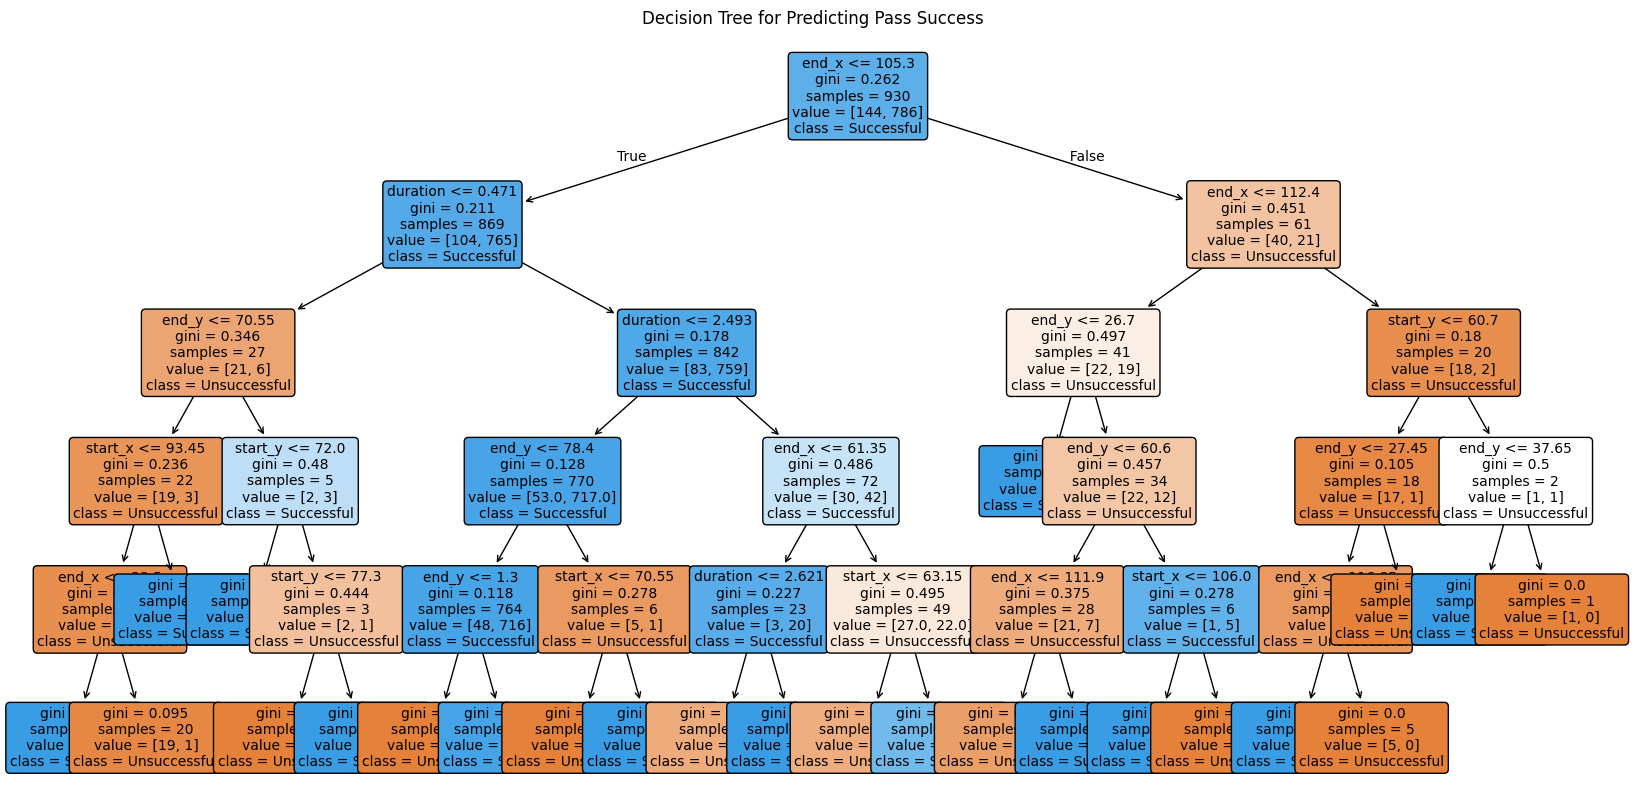

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=["duration", "start_x", "start_y", "end_x", "end_y"],
    class_names=["Unsuccessful", "Successful"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Pass Success")
plt.show()


In [6]:
# Compute feature importances
feature_importances = pd.DataFrame({
    'Feature': ["duration", "start_x", "start_y", "end_x", "end_y"],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances


,Feature,Importance
3,end_x,0.368971
0,duration,0.339020
4,end_y,0.182385
1,start_x,0.085537
2,start_y,0.024088


The end_x values in the dataset range from 1.8 to 120.0. This suggests that the scale for end_x likely corresponds to a normalized range where 120 represents the full length of the football pitch. This is commonly used in some football data formats.

Feature Engineering:

 * Improved Destination: Adjust the destination coordinates of unsuccessful passes to reflect the closest teammate's location.
 * Pass Distance: Calculate the distance between the origin and the improved destination of each pass.
 * Distance to Goal: Calculate the distance from the improved destination to the opponent's goal.
 * Distance to Center: Measure the distance from the improved destination to the center of the field.
 * Interceptability: Estimate how likely a defender is to intercept the pass by calculating the minimum speed required for them to reach the improved destination before the ball.

Data Normalization:
 * Normalize all coordinates assuming a field size of 105x68 meters.
Handling Edge Cases:
 * Adjust for passes with zero duration by replacing them with the estimated duration based on average pass speed.

In [7]:
import numpy as np

# Define pitch dimensions
pitch_ww = 105  # width of the pitch in meters
pitch_hh = 68   # height of the pitch in meters

# Normalize existing coordinates
df_passes['norm_origin_pos_x'] = df_passes['start_x'] / pitch_ww
df_passes['norm_origin_pos_y'] = df_passes['start_y'] / pitch_hh
df_passes['norm_destination_pos_x'] = df_passes['end_x'] / pitch_ww
df_passes['norm_destination_pos_y'] = df_passes['end_y'] / pitch_hh

# Placeholder for improved destination function
def improved_destination(row):
    if row['success'] == 1:
        row['improved_destination_pos_x'] = row['norm_destination_pos_x']
        row['improved_destination_pos_y'] = row['norm_destination_pos_y']
    else:
        # Here we would find the closest teammate (placeholder for possession_team_players logic)
        # Simulating an improved destination for now
        row['improved_destination_pos_x'] = row['norm_destination_pos_x']
        row['improved_destination_pos_y'] = row['norm_destination_pos_y']
    return row

# Apply the improved destination logic
df_passes = df_passes.apply(improved_destination, axis=1)

# Calculate pass distance
def calculate_pass_distance(row):
    row['pass_distance'] = np.sqrt(
        ((row['norm_origin_pos_x'] - row['improved_destination_pos_x']) * pitch_ww) ** 2 +
        ((row['norm_origin_pos_y'] - row['improved_destination_pos_y']) * pitch_hh) ** 2
    )
    return row

df_passes = df_passes.apply(calculate_pass_distance, axis=1)

# Calculate distance to goal
goal_center = [105, 68 / 2]  # Assuming goal is at the end of the pitch
df_passes['opp_goal_x'] = goal_center[0] / pitch_ww
df_passes['opp_goal_y'] = goal_center[1] / pitch_hh

def calculate_distance_to_goal(row):
    row['distance_to_goal'] = np.sqrt(
        ((row['improved_destination_pos_x'] - row['opp_goal_x']) * pitch_ww) ** 2 +
        ((row['improved_destination_pos_y'] - row['opp_goal_y']) * pitch_hh) ** 2
    )
    return row

df_passes = df_passes.apply(calculate_distance_to_goal, axis=1)

# Calculate distance to center of the field
def calculate_distance_to_center(row):
    row['distance_to_center'] = abs(row['improved_destination_pos_y'] - 0.5) * pitch_hh
    return row

df_passes = df_passes.apply(calculate_distance_to_center, axis=1)

# Check the updated DataFrame structure and sample values
df_passes[['pass_distance', 'distance_to_goal', 'distance_to_center']].head()


,pass_distance,distance_to_goal,distance_to_center
0,29.769951,71.452362,6.0
1,68.335203,44.252571,40.2
2,12.490396,71.641468,15.7
3,13.046455,74.546160,28.7
4,9.585927,86.034005,32.4


In [8]:
# Calculate the mean pass speed for valid passes (non-zero duration)
df_passes['pass_speed'] = df_passes['pass_distance'] / df_passes['duration']
mean_speed = df_passes[df_passes['pass_speed'] > 0]['pass_speed'].mean()

# Replace zero-duration passes with an estimated duration based on the mean speed
def handle_zero_duration(row):
    if row['duration'] == 0:
        row['duration'] = row['pass_distance'] / mean_speed
    return row

df_passes = df_passes.apply(handle_zero_duration, axis=1)

# Recalculate pass speed after fixing zero-duration cases
df_passes['pass_speed'] = df_passes['pass_distance'] / df_passes['duration']

# Compute interceptability speed
def calculate_interceptability_speed(row):
    # Placeholder for opponent_team_players logic
    # Simulating the closest defender distance
    closest_defender_distance = np.sqrt(
        ((row['improved_destination_pos_x'] - 0.5) * pitch_ww) ** 2 +
        ((row['improved_destination_pos_y'] - 0.5) * pitch_hh) ** 2
    )
    row['interceptability_speed'] = closest_defender_distance / row['duration']
    return row

df_passes = df_passes.apply(calculate_interceptability_speed, axis=1)

# Check the updated DataFrame with the new features
df_passes[['pass_speed', 'interceptability_speed']].head()


,pass_speed,interceptability_speed
0,14.769266,9.743163
1,20.786873,16.015645
2,7.362324,13.814137
3,11.485061,29.055642
4,12.650281,55.826965


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the feature set (X) and the target variable (y)
X = df_passes[['duration', 'pass_distance', 'distance_to_goal', 'distance_to_center', 'interceptability_speed']]
y = df_passes['success']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=False)

print(report)


              precision    recall  f1-score   support

           0       0.71      0.46      0.56        54
           1       0.91      0.97      0.94       295

    accuracy                           0.89       349
   macro avg       0.81      0.71      0.75       349
weighted avg       0.88      0.89      0.88       349



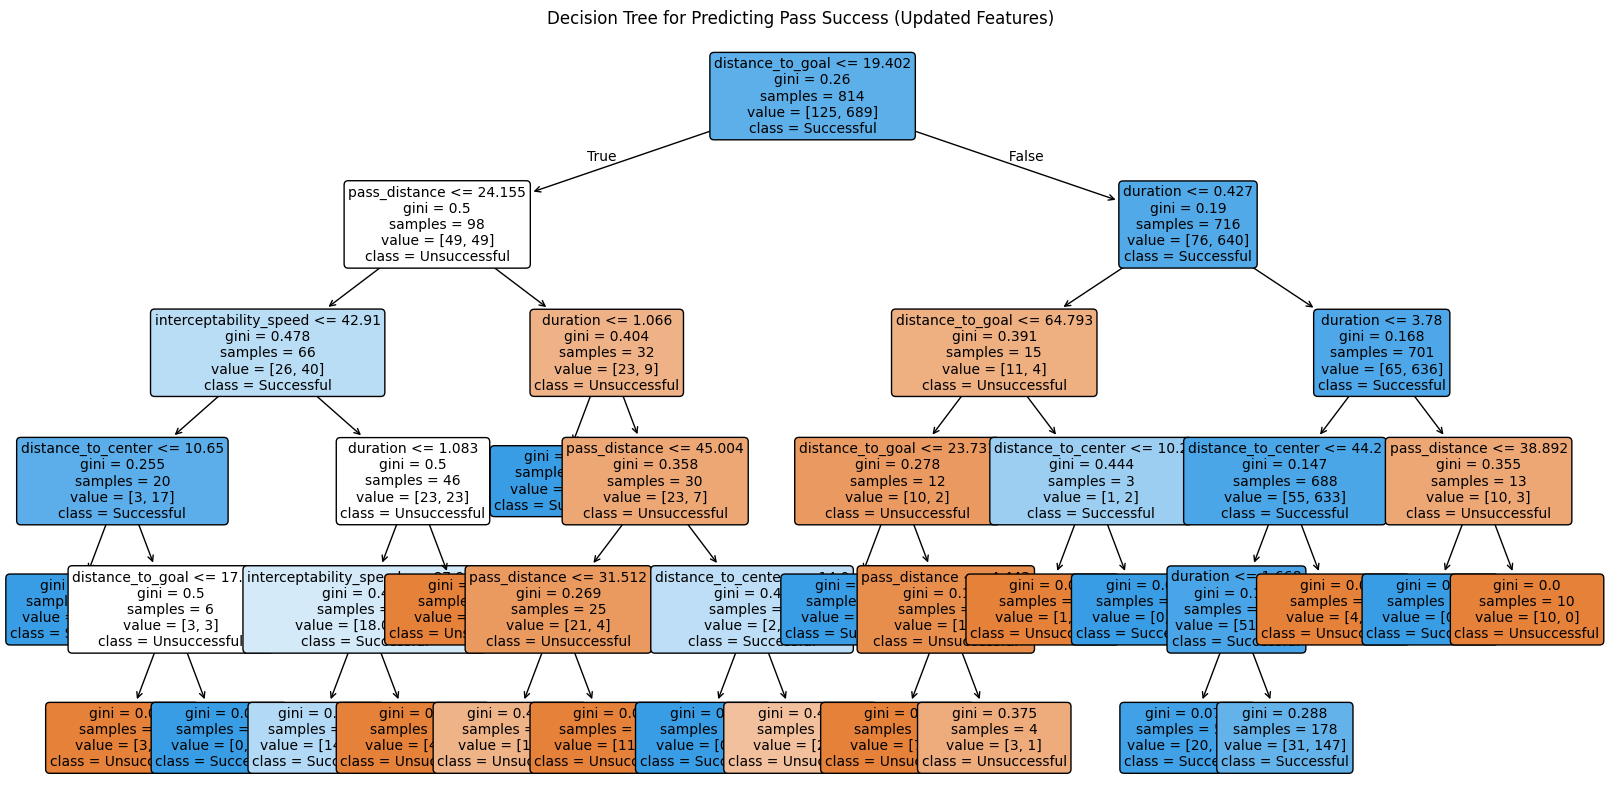

In [11]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=['duration', 'pass_distance', 'distance_to_goal', 'distance_to_center', 'interceptability_speed'],
    class_names=['Unsuccessful', 'Successful'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Pass Success (Updated Features)")
plt.show()
